In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()  # Prompts a file upload dialog

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [3]:
import pandas as pd
df = pd.read_csv('ToyotaCorolla - MLR.csv')  # Replace 'filename.csv' with your file name
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [6]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [12]:
df.duplicated().sum()  # CHECK FOR DUPLICATE VALUES

1

In [11]:
df.drop_duplicates()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


EDA & VISUALIZATION

In [18]:
data.rename(columns={"Age_08_04": "Age"}, inplace=True)
data

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,5,1015,False,True


In [16]:
data=df.drop(columns=["Cylinders"])   # as columns contains same values

In [19]:
data = pd.get_dummies(data, columns=["Fuel_Type"], drop_first=True)
data


Text(0, 0.5, 'Freq')

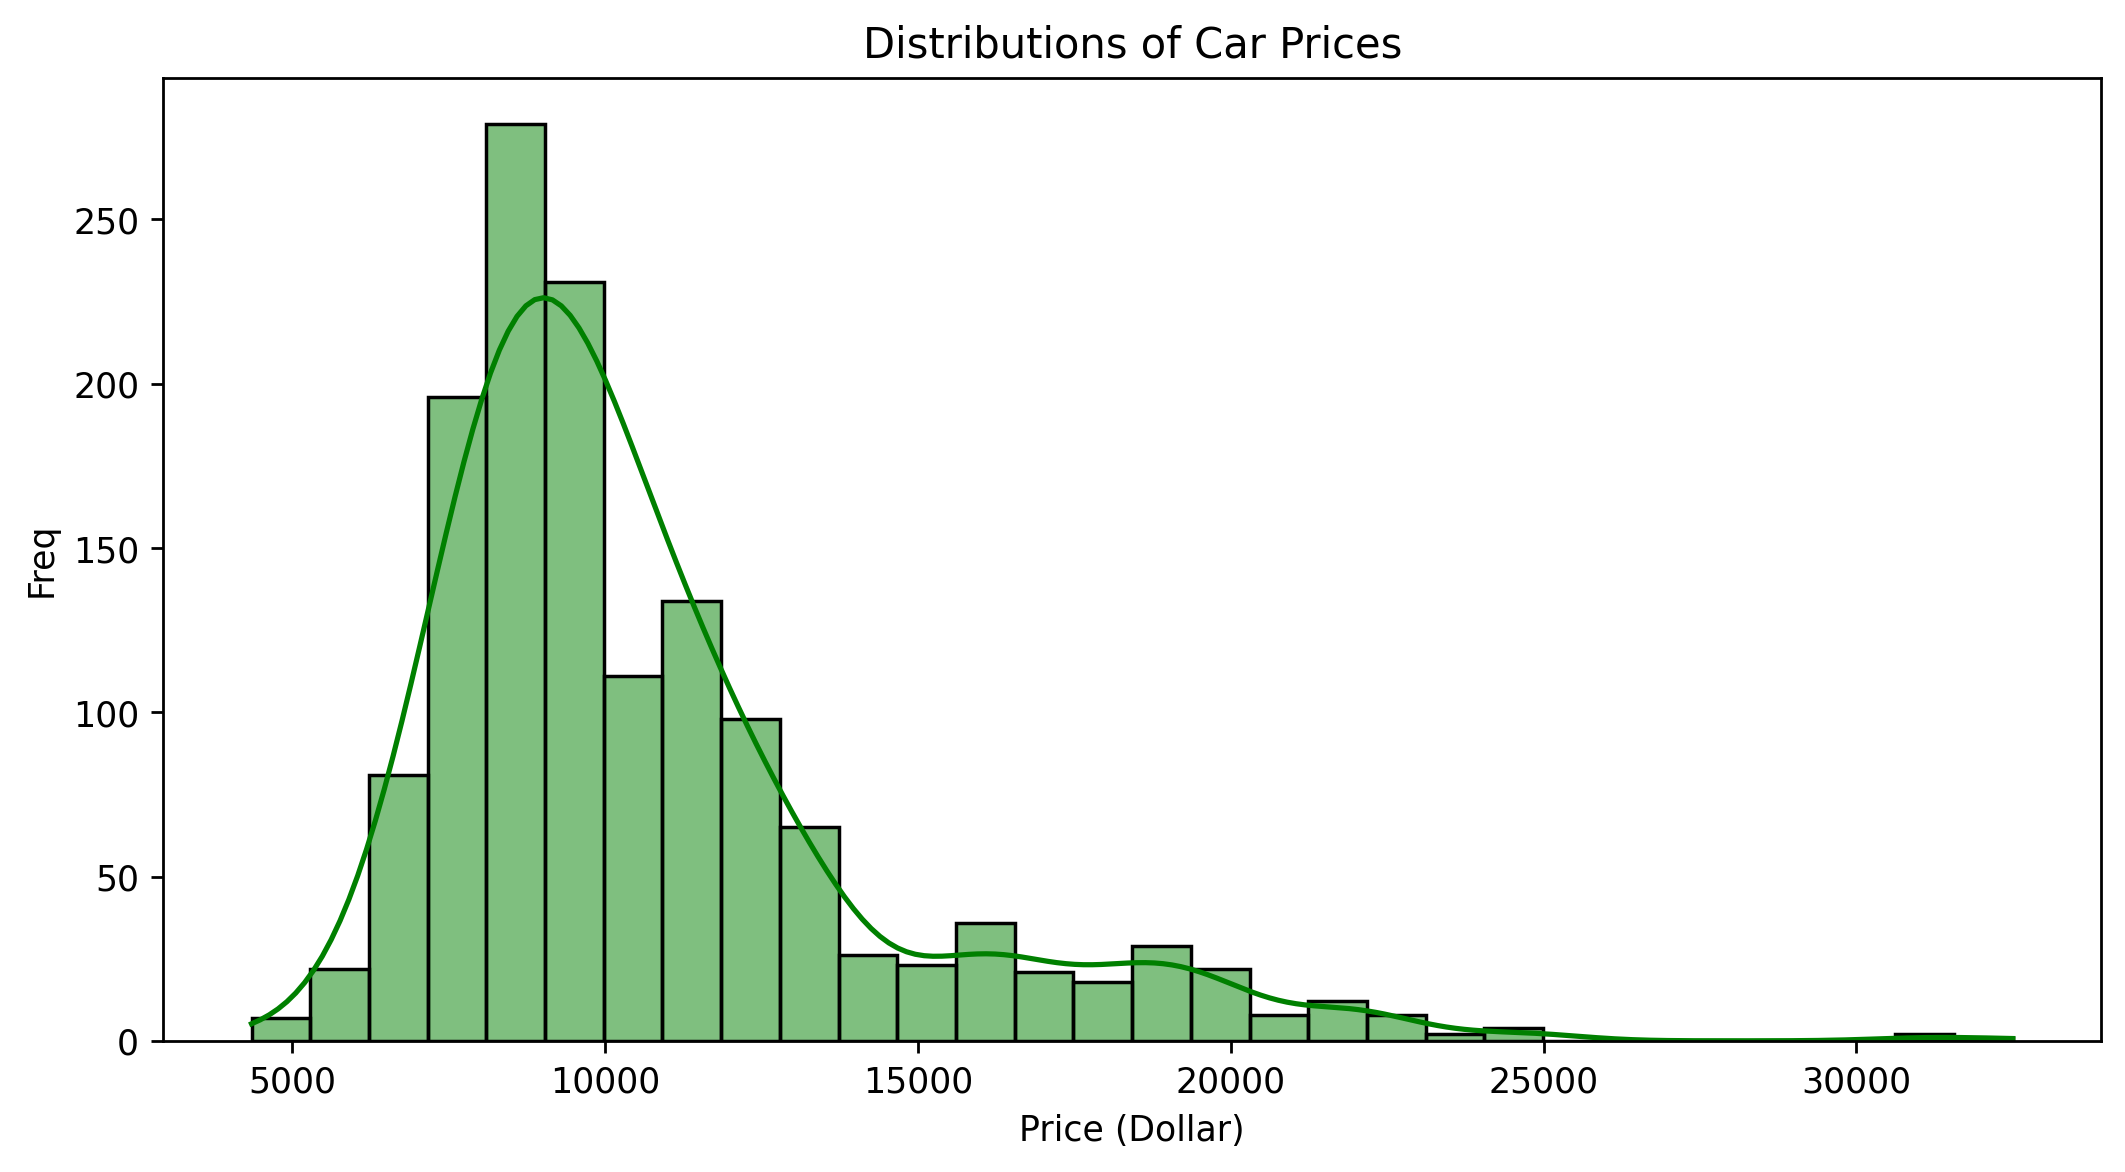

In [20]:
# Plotting the distribution of the target variable (Price)
sns.histplot(data['Price'], kde=True, bins=30, color='green')
plt.title("Distributions of Car Prices")
plt.xlabel("Price (Dollar)")
plt.ylabel("Freq")

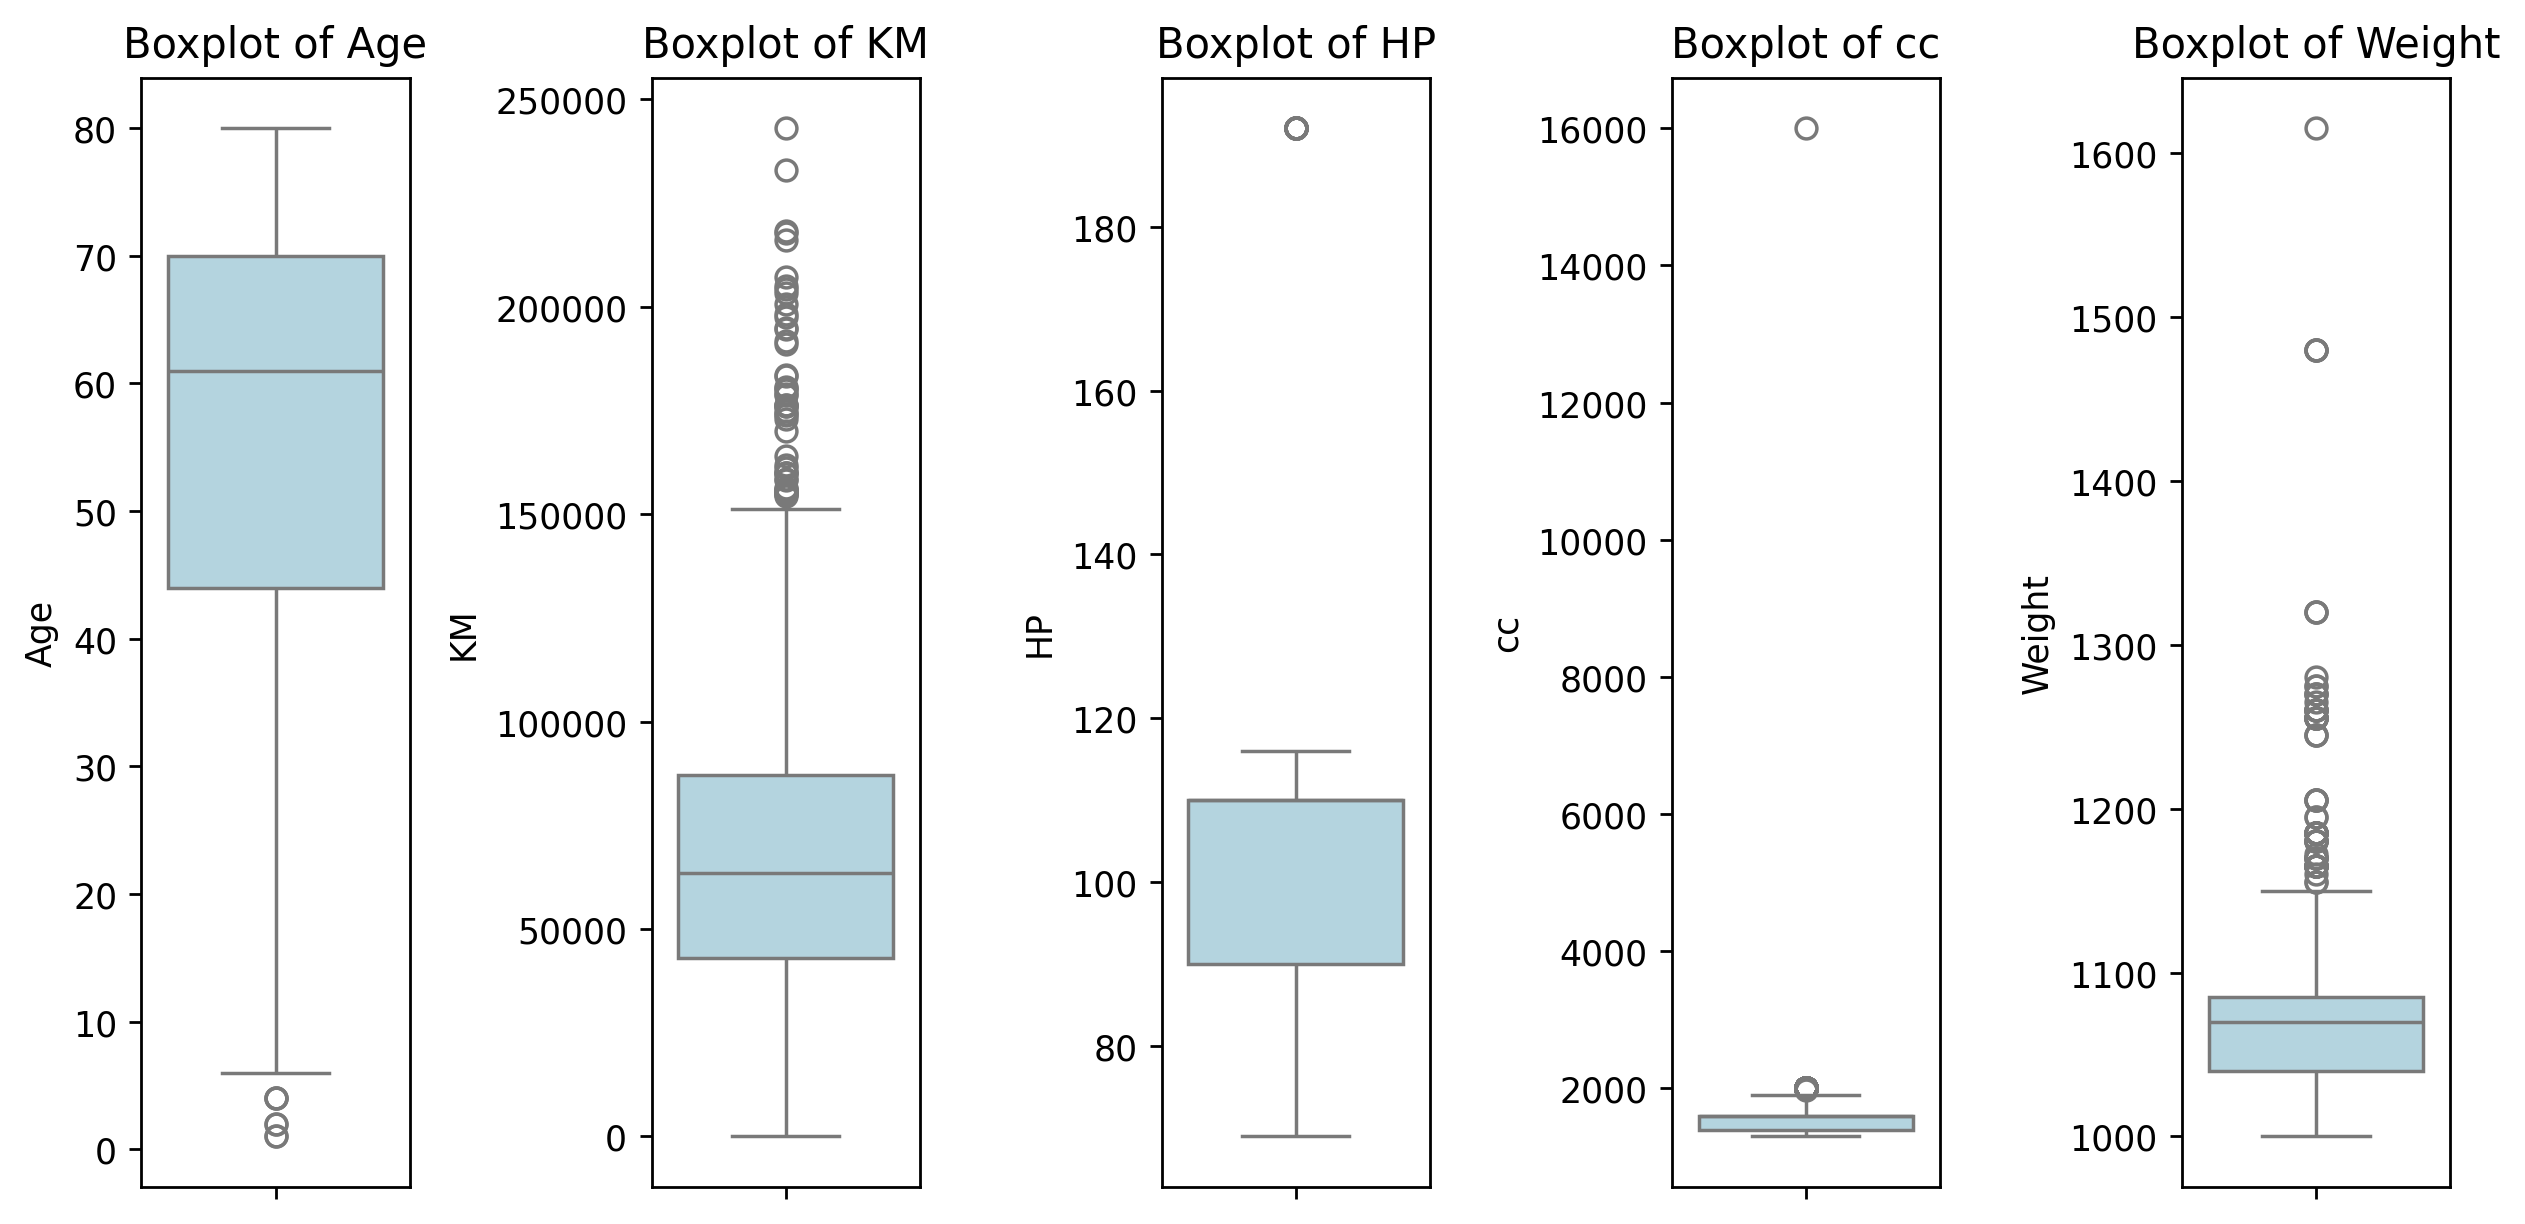

In [21]:
# Boxplot for numerical variables to identify outliers in data
num_col = ["Age", "KM", "HP", "cc", "Weight"]
for i, col in enumerate(num_col, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=data[col], color="lightblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()

**TRAIN TEST SPLIT**


In [22]:
# Split the dataset into features and target variable
X = data.drop('Price', axis=1)  # SEPERATING TARGET COLUMN AND STORING IT IN Y VAR
y = data['Price']

In [23]:
X

,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,True,False
1,23,72937,90,0,2000,3,5,1165,True,False
2,24,41711,90,0,2000,3,5,1165,True,False
3,26,48000,90,0,2000,3,5,1165,True,False
4,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,False,True
1432,72,19000,86,0,1300,3,5,1015,False,True
1433,71,17016,86,0,1300,3,5,1015,False,True
1434,70,16916,86,0,1300,3,5,1015,False,True


In [24]:
# CHANGING ENCODING TO 1/0 instead OF TRUE AND FALSE
X["Fuel_Type_Diesel"] = X["Fuel_Type_Diesel"].astype(int)
X["Fuel_Type_Petrol"] = X["Fuel_Type_Petrol"].astype(int)
X

,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,1,0
1,23,72937,90,0,2000,3,5,1165,1,0
2,24,41711,90,0,2000,3,5,1165,1,0
3,26,48000,90,0,2000,3,5,1165,1,0
4,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,1
1432,72,19000,86,0,1300,3,5,1015,0,1
1433,71,17016,86,0,1300,3,5,1015,0,1
1434,70,16916,86,0,1300,3,5,1015,0,1


In [25]:
# Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.dtypes)

Age                 int64
KM                  int64
HP                  int64
Automatic           int64
cc                  int64
Doors               int64
Gears               int64
Weight              int64
Fuel_Type_Diesel    int64
Fuel_Type_Petrol    int64
dtype: object


In [27]:
# Calculating VIF values to see if there is Multi-collinearity present or not

# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF results
vif_data

,Feature,VIF
0,const,1877.037630
1,Age,1.920520
2,KM,2.001790
3,HP,2.299766
4,Automatic,1.094550
5,cc,1.223892
6,Doors,1.217898
7,Gears,1.117413
8,Weight,3.297145
9,Fuel_Type_Diesel,11.317251


AS "Fuel_Type_Diesel" & "Fuel_Type_Petrol" HAS VALUE IS HIGH THERE IS MULTI COLIINEARITY PRESENT IN DATA


In [ ]:
#   MLR Models

In [28]:
model1 = LinearRegression()    # MODEL 1
model1.fit(X_train, y_train)

# Coefficients
print("Model 1 Coefficients:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {model1.coef_[i]}")

Model 1 Coefficients:
Age: -120.83045817097121
KM: -0.01623141061267419
HP: 14.039478769759056
Automatic: 148.83092691182037
cc: -0.0303721946070203
Doors: -60.31097437498865
Gears: 551.600710265983
Weight: 25.88495831327444
Fuel_Type_Diesel: -68.54875675828717
Fuel_Type_Petrol: 1370.8089098159805


In [29]:
from sklearn.preprocessing import PolynomialFeatures   # Model 2: Linear Regression with Polynomial Features

poly = PolynomialFeatures(degree=2)  # Quadratic features
X_train_poly = poly.fit_transform(X_train)
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)

# Coefficients
print("\nModel 3 Coefficients (Polynomial Regression):")
for i, col in enumerate(poly.get_feature_names_out(X_train.columns)):
    print(f"{col}: {model3.coef_[i]}")


Model 3 Coefficients (Polynomial Regression):
1: -0.019532697855500412
Age: 181.82946707803282
KM: -0.22012402219894478
HP: -54.03961606840006
Automatic: 7724.789496895299
cc: 30.253283333654277
Doors: -17067.48082117468
Gears: -1397.5636769267014
Weight: 19.03979223746254
Fuel_Type_Diesel: 623.4260412630506
Fuel_Type_Petrol: -628.659440010676
Age^2: 0.011410078726016184
Age KM: 0.00039849365580996166
Age HP: 0.8113960882279979
Age Automatic: 10.180750802073536
Age cc: -0.1134350516523544
Age Doors: 13.127107635106976
Age Gears: 124.30408368577685
Age Weight: -0.8185611678670103
Age Fuel_Type_Diesel: 82.29658288266592
Age Fuel_Type_Petrol: -34.01694446885985
KM^2: -8.947369045664288e-08
KM HP: -0.0003128739009765624
KM Automatic: -0.002600148159701554
KM cc: 7.3613585565013295e-06
KM Doors: -0.003490961300362194
KM Gears: -0.0030632232864560294
KM Weight: 0.00021290584540623048
KM Fuel_Type_Diesel: -0.0007306554718837788
KM Fuel_Type_Petrol: 0.021878768915603253
HP^2: 0.45735158534617

In [ ]:
X_train_interaction = X_train.copy()            # Model 3: Linear Regression with Interaction Terms
X_train_interaction['Age_KM'] = X_train['Age'] * X_train['KM']  # Interaction term
model2 = LinearRegression()
model2.fit(X_train_interaction, y_train)

# Coefficients
print("\nModel 2 Coefficients (with interaction term):")
for i, col in enumerate(X_train_interaction.columns):
    print(f"{col}: {model2.coef_[i]}")

PREDICTIONS

In [31]:
# Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test.assign(Age_KM=X_test['Age'] * X_test['KM']))
y_pred3 = model3.predict(poly.transform(X_test))

In [32]:
y_pred1

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [35]:
y_pred2


In [ ]:
y_pred3

In [ ]:
# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

evaluate_model(y_test, y_pred1, "Model 1")
evaluate_model(y_test, y_pred2, "Model 2")
evaluate_model(y_test, y_pred3, "Model 3")

**Apply Lasso and Ridge Regression**

In [37]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Lasso Regression - MSE: 2202270.2600246826, R2: 0.8349467801805


In [38]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression - MSE: 2202732.244167895, R2: 0.8349121559240101


Interview Questions
**What is Normalization & Standardization and how is it helpful ?**
Normalization and standardization improve the performance of machine learning algorithms by ensuring similar scales for features. They prevent any one feature from dominating the others, leading to more accurate predictions. They also help to handle outliers and improve the computational efficiency of the algorithms uSes.

***What techniques can be used to address multicollinearity in multiple linear regression ?***

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity exists when there are linear relationships among the independent variables, this causes issues in regression analysis because it does not follow the assumption of independence among predictors. In this article, we will see what the causes are and how to detect and mitigate multicollinearity. Detecting multicollinearity involves examining various diagnostic tools to assess the degree of correlation among predictor variables. Here are some common methods:

Correlation Matrices: This involves calculating the correlation coefficients between pairs of predictor variables. High correlation coefficients (close to +1 or -1) indicate strong linear relationships between variables, which may suggest multicollinearity.

Variance Inflation Factors (VIFs): VIF measures how much the variance of an estimated regression coefficient is inflated due to multicollinearity. A VIF greater than 10 (some use 5) is often considered indicative of multicollinearity, suggesting that the variance of the coefficient estimate is inflated by at least 10 times compared to what it would be if the predictors were uncorrelated.
By using these methods, analysts can assess the presence and severity of multicollinearity in their regression models and take appropriate steps to address it, such as removing highly correlated variables or using regularization techniques.